# Deep Learning: Homework 3

-------------------------------


**Name:** WU Zhi

**SN:** 17040772 

-----------------------------------


**Start date:** *12th Feb 2018*

**Due date:** *5th March 2018, 11:55 pm*

------------------------------------

## How to Submit

When you have completed the exercises and everything has finsihed running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_hw3.ipynb** before the deadline above.

Also send a **sharable link** to the notebook at the following email: ucl.coursework.submit@gmail.com. You can also make it sharable via link to everyone, up to you.

Please compile all results ( table in Q2) and all answers to the understanding/analysis results questions (Q1 and Q3), into a PDF. Name convention: **studentnumber_DL_hw3.pdf**. Do not include any of the code (we will use the notebook for that). 

**Page limit: 7 pg ** (w/o the bonus question).

------------------------------------------------

## MNIST as a sequence
In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. The images have a resolution of $28\times 28$ pixels. This is the same dataset as in Assignment 1, but we will be using this data a bit differently this time around. Since this assignment will be focusing on recurrent networks that model sequential data, we will be looking at each image as a sequence: the networks you train will be "reading" the image one row at a time, from top to bottom (we could even do pixel-by-pixel, but in the interest of time we'll do row-by-row which is faster).  Also, we will work with a binarized version of MNIST -- we constrain the values of the pixels to be either $0$ or $1$. You can do this by applying the method `binarize`, defined below, to the raw images.

<img src="https://github.com/bodono/files/blob/master/mnist_as_sequence.png?raw=true">

* We take the MNIST images, binarise them, and interpret them as a sequence of pixels from top-left to bottom-right. ("Task 2" refers to the next homework, wherein you will be using the sequence for pixel prediction).

## Recurrent Models for MNIST

As discussed in the lectures, there are various ways and tasks for which we can use recurrent models. A depiction of the most common scenarios is available in the Figure below. In this assignment and the following one we will look at two of these forms: **many-to-one** (sequence to label/decision) and the **many-to-many** scenario where the model receives an input and produces an output at every time step. You will use these to solve the following tasks: i) classification (*this homework*), ii) pixel prediction (*next homework*) and iii) in-painting (*next homework*).

<img src="https://github.com/bodono/files/blob/master/rnn_models.png?raw=true">
* ([Figure adapted from Karpathy's The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness)). You will be implementing variants of *many-to-one* for classification (in this homework), and *many-to-many* for prediction (in the next homework).


## Q1: Understanding LSTM vs GRU (30 pts)
Before going deeper into your practical tasks, take some time to revise and make sure you understand the two major types of recurrent cells you will be using in this assignment: Long-Short Term Memory Units (LSTM) first introduced by Hochreiter and Schmidhuber [1997] and the more recent Gated Recurrent Units (GRU) by Cho et al. [2014]. Once you have done this, answer the following questions:

(1) Can LSTMs (and respectively GRUs) just store the current input in the state ($c_t$ for LSTM and $h_t$ for GRU, in the class notation) for the next step? If so, give the gates activation that would enable this behaviour. If not, explain why not. [10 pts]

    ANS: Yes
  * For LSTM

    $C_t=\sigma(f_t) \bigodot C_{t-1} + \sigma(i_t) \bigodot tanh(j_t)$   where $\sigma()$ is sigmoid function

   If LSTM just store the current input ($x_t$) in the state ($c_t$) for the next stage, there is no $C_{t-1}$ cell input. When $\sigma(f_t) \bigodot C_{t-1}$ equal 0, this behaviour can be enabled, and it indicate $\sigma(f_t) = 0$ 

  * For GRU

    $h_t= (1-z_t) \bigodot \tilde{h} + z_t\bigodot h_{t-1}$   

   Where $z_t=\sigma(x_tU_r + h_{t-1}W_z + b_z)$ and $\tilde{h}=tanh(x_tU_t + (h_{t-1} \bigodot r_t)W_h+b_h)$

   If GRUs just store the current input ($x_t$) in the state ($h_t$) for the next stage, there is no $h_{t-1}$ cell input. When $z_t=0$ and $r_t=0$, this behaviour can be enabled.


(2) Can LSTMs (and respectively GRUs) just store a previous state into the current state and ignore the current input? If so, give the gates' activation that would enable this. If not, explain why not. [10 pts]

    ANS: Yes
    
    
    
  * For LSTM
  
    Before generating new memories, we need to determine whether the new words we currently see are important. The input gate determines whether or not it participates in generating a new memory by determining whether the input value is worth keeping according to the input and past hidden layer states. 
    
    For this question, when LSTMs and GRUs just store a previous state into the current state and ignore the current input, it means the input gate is 0.

    $C_t=\sigma(f_t) \bigodot C_{t-1} + \sigma(i_t) \bigodot tanh(j_t)$   where $\sigma()$ is sigmoid function

   when input gata equal 0, $\sigma(i_t) \bigodot tanh(j_t) = 0$, and it means $C_t$ ingore the input value in the case of the input information is not important.
  * For GRU

    $h_t= (1-z_t) \bigodot \tilde{h} + z_t\bigodot h_{t-1}$   

   Where $z_t=\sigma(x_tU_r + h_{t-1}W_z + b_z)$ and $\tilde{h}=tanh(x_tU_t + (h_{t-1} \bigodot r_t)W_h+b_h)$

   If GRUs just store the previous state ($h_{t-1}$) in the state ($h_t$) for the next stage, it means $C_t$ ingore the input value in the case of the input information is not important. When $(1-z_t) \bigodot \tilde{h}=0$ and $z_t=1$, this behaviour can be enabled.

(3) Are GRUs a special case of LSTMs? If so, give the expression of the GRU gates in term of LSTM's gates ($o_t, i_t, f_t$). If not, give a counter-example. Assume here the same input. [10 pts]

   + ANS: NO 
    
   LSTMs use $i_t$, $f_t$ and $o_t$ to impress input gata, forget gata and output gata respectively, whereas GRUs use $z_t$ and $r_t$ to impress updata and reset gatas. We can show that the the LSTM output with gates set to $f_t=z_t$ ($z_t$ is from the GRU), $i_t=1−f_t$, open output-gate $o_t=1$, is equal to the GRU output with open-reset gate $r_t=1$, only if the output-activation function of the LSTM is replaced by a linear function. As we need to make additional assumptions on the gates of the GRU, it is not a special case of the LSTM.
    
    

**Word limit: ** 1000 words or less




## Q2: Implementation. Line-by-Line MNIST Classification (50 pts)
In this part you will train a number of many-to-one recurrent models that takes as input: an image (or part of an image) as a sequence (row by row) and after the last input row produces, as output, a probability distribution over the $10$ possible labels ($0-9$). The models will be trained using a cross-entropy loss function over these output probabilities.

### Optimization
Use the Adam optimizer (with default settings other than the learning rate) for training.

**[Optional]** Sometimes dropout has been shown to be beneficial in training recurrent models, so feel free to use it or any other form of regularization that seems to improve performance. It might be also worth trying out batch-normalization. [Reference](https://arxiv.org/pdf/1603.09025.pdf).

### Models: Your models will have the following structure:
1. [(Red Block)] The *input* (current binarised row of pixels) can be fed directly into the recurrent connection without  much further pre-processing. The only thing you need to do is have an affine transformation to match the dimensionality of the recurrent unit, i.e. one of $(32, 64, 128)$.
2. [(Blue Block)] The *output* (probabilities over the 10 classes) is produced by looking at the last output of the recurrent units, transforming them via an affine transformation.
3. [(Green Block)] For the *recurrent* part of the network, please implement and compare the following architectures:
    * LSTM with 32, 64, 128 units. [15 pts]
    * GRU with 32, 64, 128 units. [15 pts]
    * stacked LSTM: 3 recurrent layers with 32 units each. [10 pts]
    * stacked GRU: 3 recurrent layers with 32 units each. [10 pts]

Your network should look like:
\begin{equation}
\textrm{Input} \Rightarrow \textrm{RNN cell} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Relu} \Rightarrow \textrm{Fully connected} \Rightarrow \textrm{Output}
\end{equation}
You might find the function `tf.nn.dynamic_rnn` useful.

### Hyper-parameters 
For all cases train the model with these hyper-parameter settings:

- *num_epochs*=10, *learning_rate*=0.001, *batch_size*=256, *fully_connected_hidden_units=64*

With these hyper-parameters you should be comfortably above $95\%$ test set accuracy on all tasks. (Feel free to try other settings, there are certainly better choices, but please report the results with these exact hyper-parameters). Please report the *cross-entropy* and the *classification accuracy* for the *test set* of the models trained. Use the `plot_summary_table` method below to format the table.


##Q3: Analyse the results (20 pts + 10 pts)

(1) How does this compare with the results you obtained in the first assignment(DL1), when training a model that "sees" the entire image at once? Explain differences. [5 pts]

    ANS:

    Comparing LSTMs and GRUs trained model with NN and CNN trained model, we can find that the test accuracy of LSTMs and GRUs trained model are higher than NN model but lower than CNN model.By comparing RNN with NN, RNN process is to add a hidden state at each step. This state is used to express all memory, and this memory will directly affect the "output" of this step, so RNN trained model result is higher than NN model. By comparing RNN with CNN, CNN work better than RNN because CNN will learn to recognize components of an image and then learn to combine these components to recognize larger structures. But in case of RNN, it will similarly learn to recognize patterns across time.

(2) Let us take a look closer look at one of the trained models: say GRU (32). Plot the outputs of the RNN layer and hidden state over time. In particular, look at the first 3-5 time steps. Plot the input image along side. 
You can use ```python
plt.imshow(output_GRU_over_time)
```
for these, where ```output_GRU_over_time.shape``` is (T=28,hidden_units) dimensional. What do you observe? Show at least one pair of these plots to support your observation(s). [5 pts]

    ANS: 
    
    The figures below (the cell output below) shows GRU (32) outputs of the RNN layer and hidden state over time and input image, and two pair of figures are plotted. From fitst 0-5 time steps, it can be found that the first pair figures(input number '1') 32 hidden units value are similar at the begining, but the difference become bigger in the fifth step. The second pair figures(input number '2') 32 hidden units value are similar at the begining as well, but the difference become bigger in the third step. The time when 32 hidden units value become bigger is decided by the input image. Because the first input image(number '1') handwriting begin at row 5, whereas the second input image(number '2') handwriting begin at row 3.


(3) Now, look at the last 3-5 time steps. What do you observe? When is the classification decision made? To validate your answer to the second part of the question, provide the classification predictions for the last 5 time steps -- that is, pretend whatever the output of the GRU is at that time step is in fact the last output in the computation, and feed that into the classification mapping. [10 pts] 

    ANS: 
    
    The figures below (the cell output below) shows GRU (32) outputs of the RNN layer and hidden state over time and input image, and two pair of figures are plotted. 
    
    From the last 5 step, it can be found that both two images made decision before inputting the last row image pixel. For the first pair of figure (input number '1'), the classification decision made at step 23, and the second pair of figures (input number '2')  made decision at step 25.
    
    The classification predictions are plotted as well in the right of two pair figures. From the classification predictions figure, we can find the first image made disicion at step 24, and the second made decision at step 25. The answer in hidden state value prediction can be validated. 

**Word limit:** 500 words or less 


**[Bonus]** Let's looking inside the computation. Take one of the previous LSTM models (for simplicity pick one of the one-layer recurrence models) and track the status of the gates ($o_t, i_t, f_t$) over time. Note that if you used the provided RNNCell wrappers (BasicLSTMCell and co) in tensorflow, these will keep this information hidden, so you will need to implement your own version of this recurrence layer, or mirror the one in tensorflow, but now exposing these hidden variables. A bit of warning: this is not trivial and will require some thinking on the coding side, but it will also provide you with a more informative way of visulazing the inner computation.  [10 pts]

**Word limit:** 300 words or less 

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


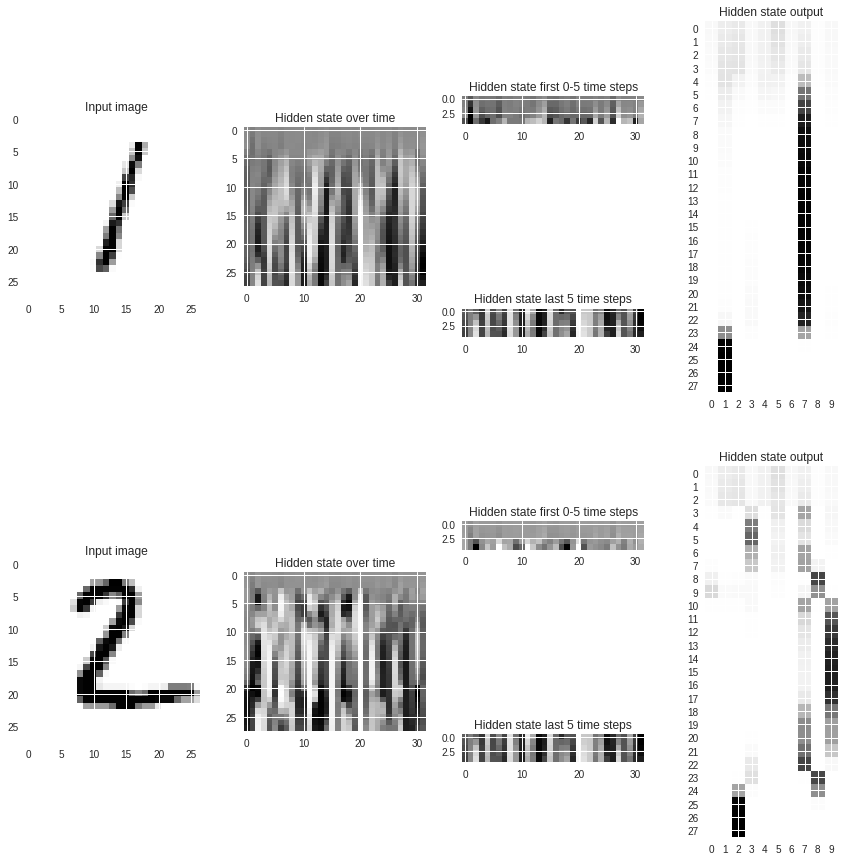

In [53]:
mnist = get_data()
a = np.array(decision_hidden)
image = mnist.test.images.reshape(-1, 28, 28)
plt.figure(num = 'Result', figsize = (15, 15))

plt.subplot(2,4,1)
plt.title('Input image')
plt.imshow(image[2])

plt.subplot(2,4,2)
plt.title('Hidden state over time')
plt.imshow(result[2])

plt.subplot(4,4,3)
plt.title('Hidden state first 0-5 time steps')
plt.imshow(result[2][0:5,:])

plt.subplot(4,4,7)
plt.title('Hidden state last 5 time steps')
plt.imshow(result[2][-5:,:])

plt.subplot(2,4,5)
plt.title('Input image')
plt.imshow(image[1])

plt.subplot(2,4,6)
plt.title('Hidden state over time')
plt.imshow(result[1])

plt.subplot(4,4,11)
plt.title('Hidden state first 0-5 time steps')
plt.imshow(result[1][0:5,:])

plt.subplot(4,4,15)
plt.title('Hidden state last 5 time steps')
plt.imshow(result[2][-5:,:])

plt.subplot(2,4,4)
plt.title('Hidden state output')
x_range = range(10)
y_range = range(28)
plt.xticks(x_range); plt.yticks(y_range)
plt.imshow(a[:,2,:])

plt.subplot(2,4,8)
plt.title('Hidden state output')
x_range = range(10)
y_range = range(28)
plt.xticks(x_range); plt.yticks(y_range)
plt.imshow(a[:,1,:])

# Imports and utility functions (do not modify!)

In [0]:
a = np.array(decision_hidden)
x_range = range(10)
y_range = range(28)
plt.xticks(x_range); plt.yticks(y_range)
plt.imshow(a[:,2,:])

In [0]:
# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

# Binarize the images
def binarize(images, threshold=0.1):
  return (threshold < images).astype('float32')

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y = tf.placeholder(tf.float32, [None, 10])
  return x, y

# Generate summary table of results. This function expects a dict with the
# following structure: keys of 'LSTM' or 'GRU' and the values for each key are a
# list of tuples consisting of (test_loss, test_accuracy), and the list is
# ordered as the results from 32 units, 64 units, 128 units, 3 x 32 units, i.e.:
# {
#  'LSTM': [(loss,acc), (loss, acc), (loss, acc), (loss, acc)]
#  'GRU': [(loss,acc), (loss, acc), (loss, acc), (loss, acc)]
# }
def plot_summary_table(experiment_results):
  # Fill Data.
  cell_text = []
  columns = ['(1 layer, 32 units)', '(1 layer, 64 units)', '(1 layer, 128 units)', '(3 layers, 32 units)']
  for k, v in experiment_results.iteritems():
    rows = ['Test loss', 'Test accuracy']
    cell_text=[[],[]]
    for (l, _) in v:
      cell_text[0].append(str(l))
    for (_, a) in v:
      cell_text[1].append(str(a))

    fig=plt.figure(frameon=False)
    ax = plt.gca()
    the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
    the_table.scale(2, 8)
    # Prettify.
    ax.patch.set_facecolor('None')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.text(-0.73, 0.9, k, fontsize=18)

The code below is GRU (32) for anwser Question 3.

In [27]:
    time_steps = 28
    num_units = 28

    # Your models here
    tf.reset_default_graph()
    num_epochs = 10
    learning_rate = 0.001
    batch_size = 256 
    fully_connected_hidden_units = 64
    num_classes = 10

    mnist = get_data()
    eval_mnist = get_data()

    x, y_ = get_placeholders()
    x_reshape = tf.reshape(x, [-1, 28, 28])
    
    initializer = tf.contrib.layers.xavier_initializer()
    time_steps = 28
    num_units = 28

    RNN_layers = [tf.nn.rnn_cell.GRUCell(size) for size in [32]]    
  
    multi_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(RNN_layers)
    lstm_output, state = tf.nn.dynamic_rnn(multi_rnn_cell, x_reshape, dtype=tf.float32) # lstm_output: bs * 28 * 32
    
    states = lstm_output
    
    lstm_outputs = tf.unstack(lstm_output, time_steps, 1)[-1] # lstm_output: bs * 32

    W_1 = tf.Variable(initializer([32, fully_connected_hidden_units]))
    b_1 = tf.Variable(initializer([fully_connected_hidden_units]))
    hid_1 = tf.nn.relu(tf.matmul(lstm_outputs, W_1) + b_1)

    W_2 = tf.Variable(initializer([fully_connected_hidden_units, fully_connected_hidden_units]))
    b_2 = tf.Variable(initializer([fully_connected_hidden_units]))
    hid_2 = tf.nn.relu(tf.matmul(hid_1, W_2) + b_2)

    W_3 = tf.Variable(initializer([fully_connected_hidden_units, num_classes]))
    b_3 = tf.Variable(initializer([num_classes]))
    y = tf.matmul(hid_2, W_3) + b_3
    
    
    # test all hidden state 
    decision = []
    for i in range(28):
      hid_1_hidden = tf.nn.relu(tf.matmul(lstm_output[:,i,:], W_1) + b_1)
      hid_2_hidden = tf.nn.relu(tf.matmul(hid_1_hidden, W_2) + b_2)
      y_hidden = tf.nn.softmax(tf.matmul(hid_2_hidden, W_3) + b_3)
      decision.append(y_hidden)
      
    decision_done = decision

    # loss
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y))

    # update
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

    # evaluation metric 
    correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(y),1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # Your training session here
    i, train_accuracy, test_accuracy = 0, [], []
    # log_period_updates = int(log_period_samples / batch_size)

    test_acc = 0
    test_loss = 0
    with tf.train.MonitoredSession() as sess:
      while mnist.train.epochs_completed < num_epochs:

        i += 1
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        sess.run(train_step, feed_dict = {x: batch_xs, y_: batch_ys})
        
      result = sess.run(states, feed_dict= {x: mnist.test.images, y_: mnist.test.labels})
      decision_hidden = sess.run(decision_done, feed_dict= {x: mnist.test.images, y_: mnist.test.labels})


    a = result; b = decision_hidden


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


# Train Models

Generate summary table of results. This function expects a dict with the
following structure: keys of 'LSTM' or 'GRU' and the values for each key are a
list of tuples consisting of (test_loss, test_accuracy), and the list is
ordered as the results from 32 units, 64 units, 128 units, 3 x 32 units, i.e. expected dictionary (final performace only):

```python
{
  'LSTM': [(loss,acc), (loss, acc), (loss, acc), (loss, acc)]
  'GRU': [(loss,acc), (loss, acc), (loss, acc), (loss, acc)]
}
```

In [0]:
experiments_results = {}
experiments_results['LSTM'] = []
experiments_results['GRU'] = []
experiments_settings = {}
experiments_settings['LSTM'] = [[32], [64], [128], [32, 32, 32]]
experiments_settings['GRU'] =  [[32], [64], [128], [32, 32, 32]]

for RNN_type in experiments_settings:
  for num_hidden_unit in experiments_settings[RNN_type]:
    
    time_steps = 28
    num_units = 28

    # Your models here
    tf.reset_default_graph()
    num_epochs = 10
    learning_rate = 0.001
    batch_size = 256 
    fully_connected_hidden_units = 64
    num_classes = 10

    mnist = get_data()
    eval_mnist = get_data()

    x, y_ = get_placeholders()
    x_reshape = tf.reshape(x, [-1, 28, 28])
    
    initializer = tf.contrib.layers.xavier_initializer()
    time_steps = 28
    num_units = 28
    
    if RNN_type == 'LSTM':
      RNN_layers = [tf.nn.rnn_cell.LSTMCell(size) for size in num_hidden_unit]

    elif RNN_type == 'GRU':
      
      RNN_layers = [tf.nn.rnn_cell.GRUCell(size) for size in num_hidden_unit]
      
    RNN_layers = [tf.nn.rnn_cell.LSTMCell(size) for size in num_hidden_unit]
    multi_rnn_cell = tf.nn.rnn_cell.MultiRNNCell(RNN_layers)
    lstm_outputs, state = tf.nn.dynamic_rnn(multi_rnn_cell, x_reshape, dtype=tf.float32) # lstm_output: bs * 28 * 32
    lstm_outputs = tf.unstack(lstm_outputs, time_steps, 1)[-1] # lstm_output: bs * 32

    W_1 = tf.Variable(initializer([num_hidden_unit[0], fully_connected_hidden_units]))
    b_1 = tf.Variable(initializer([fully_connected_hidden_units]))
    hid_1 = tf.nn.relu(tf.matmul(lstm_outputs, W_1) + b_1)

    W_2 = tf.Variable(initializer([fully_connected_hidden_units, fully_connected_hidden_units]))
    b_2 = tf.Variable(initializer([fully_connected_hidden_units]))
    hid_2 = tf.nn.relu(tf.matmul(hid_1, W_2) + b_2)

    W_3 = tf.Variable(initializer([fully_connected_hidden_units, num_classes]))
    b_3 = tf.Variable(initializer([num_classes]))
    y = tf.matmul(hid_2, W_3) + b_3

    # loss
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y))

    # update
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

    # evaluation metric 
    correct_prediction = tf.equal(tf.argmax(tf.nn.softmax(y),1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    # Your training session here
    i, train_accuracy, test_accuracy = 0, [], []
    # log_period_updates = int(log_period_samples / batch_size)

    test_acc = 0
    test_loss = 0
    with tf.train.MonitoredSession() as sess:
      while mnist.train.epochs_completed < num_epochs:

        i += 1
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        sess.run(train_step, feed_dict = {x: batch_xs, y_: batch_ys})

        if i % (100) == 0:
          train_acc = accuracy.eval(session = sess, feed_dict= {x: mnist.train.images, y_: mnist.train.labels})
          test_acc = accuracy.eval(session = sess, feed_dict= {x: mnist.test.images, y_: mnist.test.labels})
          test_loss = cross_entropy.eval(session = sess, feed_dict= {x: mnist.train.images, y_: mnist.train.labels})
          print('test_loss', test_loss)
          print('%d th training acc: %s test acc: %s' %(i, train_acc, test_acc))
          
    experiments_results[RNN_type].append((test_loss,test_acc))

print(experiments_results)

In [0]:
# Your training session here

#Results

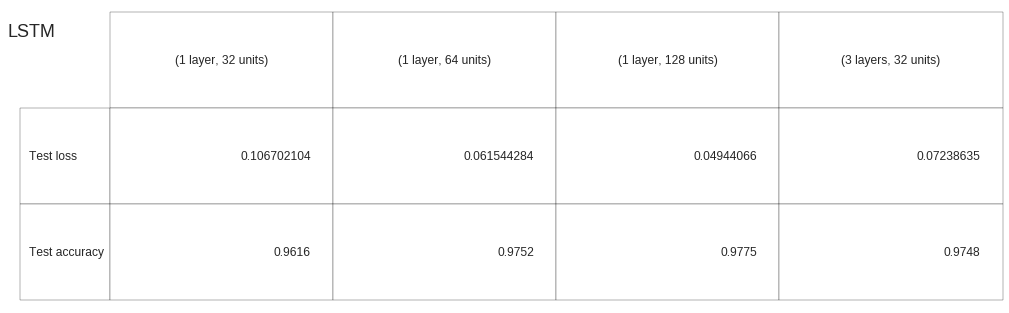

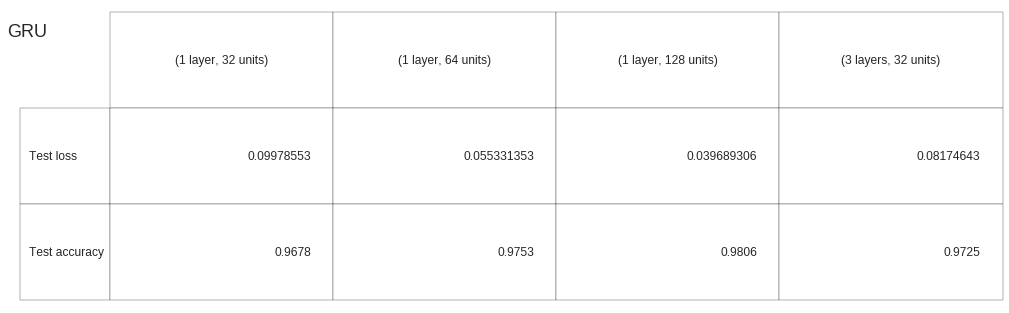

In [90]:
plot_summary_table(experiments_results)

# Analysis of results

In [1]:
# Look into the GRU computation over time

# plot one sample over time
plt.imshow(output_GRU_over_time)
plt.imshow(binarized_input_image)

# Feel free to pick a sample from the dataset that more closely supports your 
# answers in Q3.

# first 5 steps in the computation
plt.imshow(output_GRU_over_time[:5,:])

# last 5 steps in the computation
plt.imshow(output_GRU_over_time[:5,:])

NameError: ignored